### In this notebook we perform exploratory data analysis on the articles.csv file present in the H&M Personalized Fashion Recommendations dataset on Kaggle.

In [1]:
#!pip install gitly

In [1]:
from gitly.colab.plot import GitlyPlotter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'gitly'

### Loading the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
articles=pd.read_csv('/content/drive/My Drive/articles.csv')

In [5]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


### EDA and Data Preprocessing

We are only interested in the article id and names associated with the articles. So we dropped other number and code columns.

In [6]:
remove_cols=['product_code','product_type_no','graphical_appearance_no','colour_group_code','index_code',
             'index_group_no','section_no','garment_group_no','perceived_colour_value_id',
             'perceived_colour_master_id','department_no']
articles=articles.drop(remove_cols,axis=1)

Converting the article id datatype into string. By default it gets read as an integer which removes the first '0' digit so adding that as well.

In [7]:
articles['article_id'] = articles['article_id'].astype(str)
articles['article_id']=["0"+x for x in articles['article_id']]

The dataset contains non-clothing articles as well. We only want to include specific clothing articles. Studying the distribution of product groups helps in determining which groups to include.

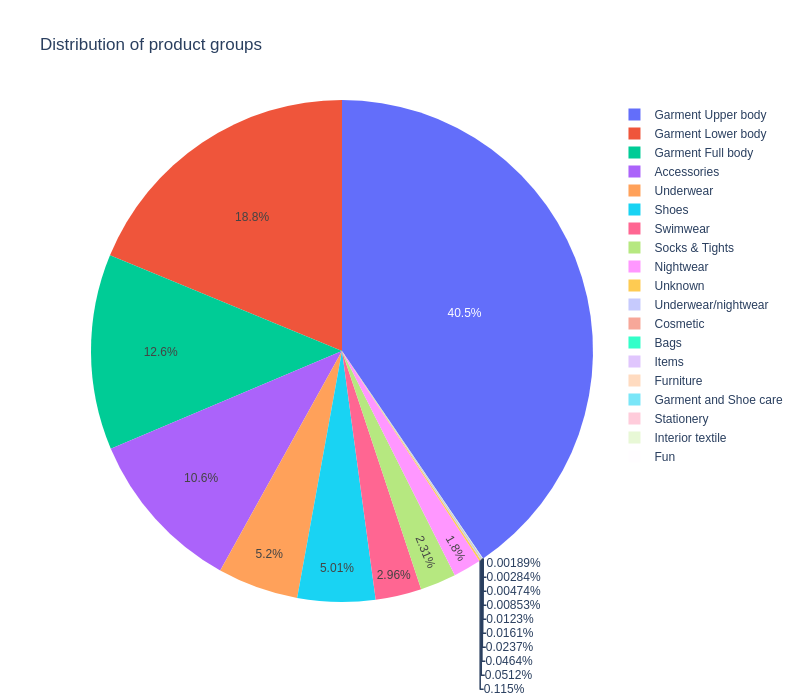

In [23]:
gitly = GitlyPlotter('github')
fig = px.pie(articles, values=articles['product_group_name'].value_counts().values,
             names=articles['product_group_name'].value_counts().index, title='Distribution of product groups')
gitly.show(fig, height = 700,  width = 800, scale = 1 )

We selected product groups as mentioned below. The percentage of articles categorized into 'Unknown' product group is significant. We decided to include it for further analysis.

In [9]:
product_groups_list=['Garment Upper body','Garment Lower body','Garment Full body','Socks and Tights','Nightwear','Shoes','Swimwear','Unknown']
selected_articles = articles.loc[articles['product_group_name'].isin(product_groups_list)].reset_index()

We look at further categories present inside the 'Unknown' product group.

In [10]:
selected_articles.loc[selected_articles['product_group_name']=='Unknown'][['product_type_name','section_name','department_name']].value_counts()

product_type_name  section_name                    department_name        
Unknown            Womens Lingerie                 Clean Lingerie             21
                                                   Expressive Lingerie        11
                   Ladies Denim                    Denim Trousers              9
                   Womens Lingerie                 Casual Lingerie             7
                   Men Suits & Tailoring           Knitwear                    6
                   Womens Small accessories        Other items                 5
                   Denim Men                       Denim shorts                5
                   Divided Collection              Trousers                    4
                   Mens Outerwear                  Jacket Casual               4
                   Baby Girl                       Baby Girl Woven             3
                   Men Underwear                   Socks Bin                   3
                   Ladies H&M Spor

Even though the product type is still mentioned as 'Unknown', there are section names and department names available.

Plotting the distribution of various sections under 'Unknown'

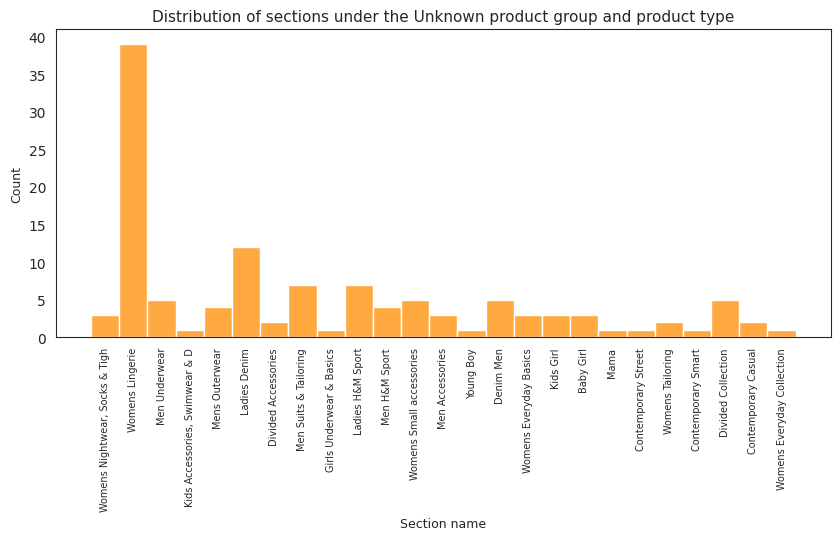

In [11]:
plt.figure(figsize=(10,4))
sns.set_style("white")
sns.histplot(x=articles.loc[articles['product_group_name']=='Unknown']['section_name'],color='darkorange')
plt.title('Distribution of sections under the Unknown product group and product type', fontsize=11)
plt.xlabel('Section name',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

the sections correspond more with the type of customers (Women, Men, Kids, etc.). It is still not very clear what type of clothing articles each section has. So we plot the distribution of departments next.

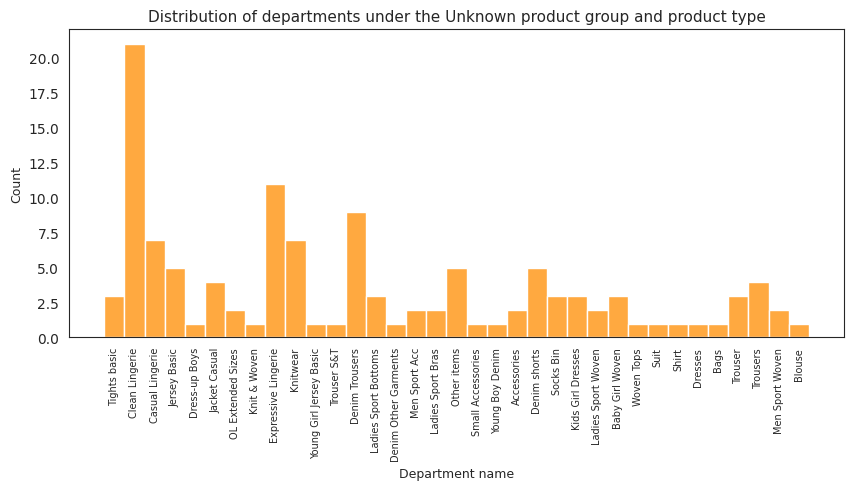

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(x=articles.loc[articles['product_group_name']=='Unknown']['department_name'],color='darkorange')
plt.title('Distribution of departments under the Unknown product group and product type', fontsize=11)
plt.xlabel('Department name', fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

Here we can easily see the actual types of products included. We select only the ones we want by dropping other departments.

In [13]:
departments_to_remove_list=['Clean Lingerie','Expressive Lingerie','Casual Lingerie','Other items','Accessories',
                           'Ladies Sport Bras','Small Accessories','Bags']
selected_unknownproductgroup_articles = selected_articles.loc[(selected_articles['product_group_name']=='Unknown') &
                                          (~selected_articles['department_name'].isin(departments_to_remove_list))]

indices_to_replace=selected_unknownproductgroup_articles.index
selected_articles.loc[indices_to_replace]=selected_unknownproductgroup_articles
selected_articles=selected_articles.drop('index',axis=1)

This is our final dataframe after completing the analysis of 'Unknown' product groups

In [14]:
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
4,0112679048,SWEATSHIRT OC,Sweater,Garment Upper body,All over pattern,Grey,Dusty Light,Grey,Baby basics,Baby Sizes 50-98,Baby/Children,Baby Essentials & Complements,Jersey Basic,Sweatshirt in soft organic cotton with a pres...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86270,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Medium Dusty,Mole,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
86271,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Medium Dusty,Mole,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
86272,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
86273,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


In [15]:
selected_articles.describe()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
count,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,85921
unique,86275,36655,53,7,30,50,8,20,225,10,5,56,21,35422
top,0108775015,Dragonfly dress,Trousers,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,T-shirt in printed cotton jersey.
freq,1,98,11169,42741,38167,18459,35782,18419,4571,25584,30177,7295,21077,159


Plotting the distributions of product tpes, garment groups and colors in the dataframe

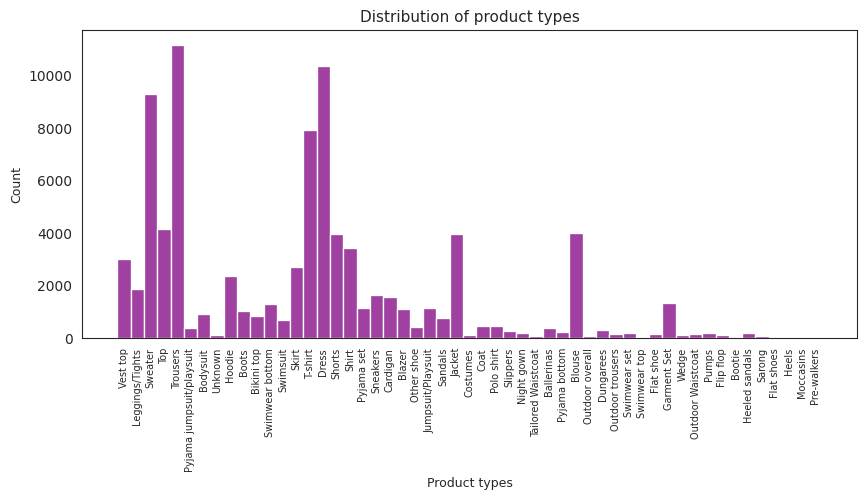

In [16]:
plt.figure(figsize=(10,4))
sns.histplot(x=selected_articles['product_type_name'],color='purple')
plt.title('Distribution of product types',fontsize=11)
plt.xlabel('Product types',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

Trousers, dresses, sweaters and T-shirts constitute the majority part of the products

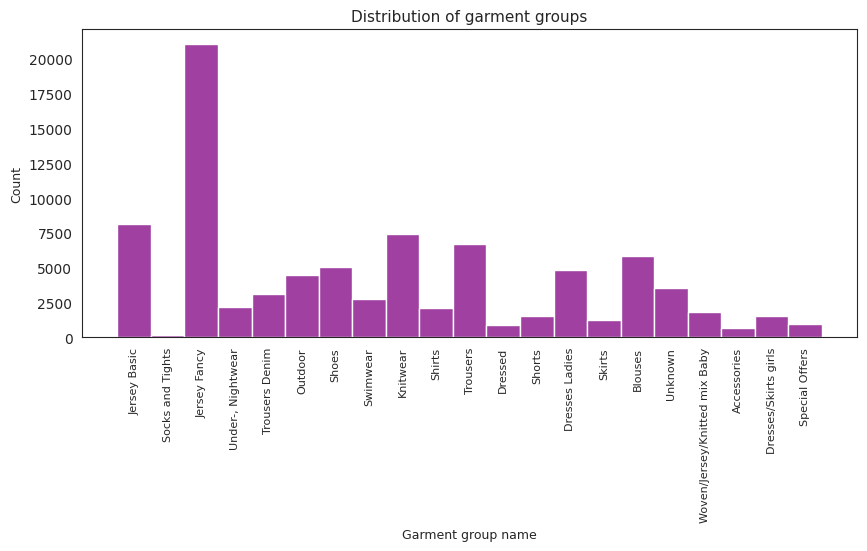

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(x=selected_articles['garment_group_name'],color='purple')
plt.title('Distribution of garment groups',fontsize=11)
plt.xlabel('Garment group name',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=8)
plt.show()

The fancy jersey garment group has the highest number of articles

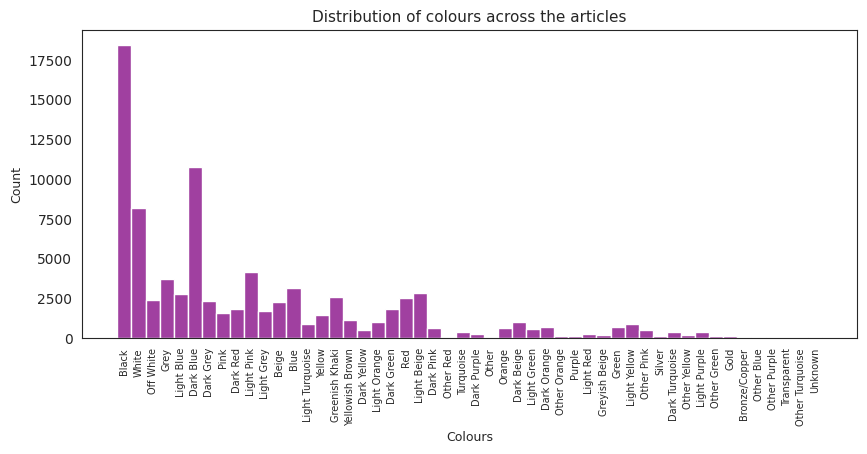

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(x=selected_articles['colour_group_name'],color='purple')
plt.title('Distribution of colours across the articles',fontsize=11)
plt.xlabel('Colours',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

Black, dark blue and white are the most common colors available

According to the dataset description, the first 3 digits of an article id correspond to the folder number in which that article's image is present. We extract these digits (indices) to get a list of image folders we're working with  

In [19]:
indices=[x[:3] for x in selected_articles['article_id']]

indices=sorted(list(set(indices)))

In [20]:
indices[:10]

['010', '011', '012', '014', '015', '016', '017', '018', '019', '020']

In [21]:
len(indices)

85